# **Importing libraries**

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import re # regular expression

import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import  LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# **Reading dataset and gives columns names respectively**


> **label 0 = Negative Sentiment**


> **label 4 = Postive Sentiment**







In [2]:
df = pd.read_csv('sentiment140.csv', names = ['label', 'ids', 'date', 'flag', 'user', 'tweet'], encoding='latin-1')
pd.options.display.max_colwidth = 200

# **EXPLORATORY DATA ANALYSIS -EDA**

In [3]:
# print first 5 rows from dataset
df.head()

,label,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [4]:
# give the numbers of rows and columns
df.shape

(1600000, 6)

In [5]:
# Gives a short summary of a dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   label   1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   tweet   1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
# Gives statistical details of dataframe
df['tweet'].describe()

count                       1600000
unique                      1581466
top       isPlayer Has Died! Sorry 
freq                            210
Name: tweet, dtype: object

**Check the distribution of data, is it data is imblance?**


In [7]:
# data is blanced both classes are equal
df['label'].value_counts()

0    800000
4    800000
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

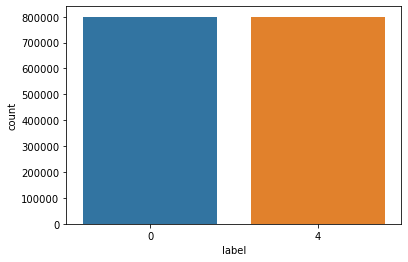

In [8]:
sns.countplot(df['label'])

In [9]:
# Checking null values in dataset
df.isnull().sum()

label    0
ids      0
date     0
flag     0
user     0
tweet    0
dtype: int64

# **Checking which is word used the most in dataset**

In [10]:
pd.Series(' '.join(df['tweet']).split()).value_counts()[:50]

to       552962
I        496619
the      487501
a        366212
my       280025
and      275263
i        250016
is       217693
you      213871
for      209801
in       202294
of       179554
it       171812
on       154365
have     132249
so       125155
me       122509
that     118685
with     110843
be       108069
but      106272
at       102196
I'm       99559
was       99140
just      96284
not       88110
this      77810
get       76734
like      73302
are       72568
up        70007
all       67901
-         67079
out       67030
go        62969
your      60854
good      59775
day       55748
do        54628
from      54182
got       53871
now       53591
going     53236
love      50051
no        49622
about     46708
work      45913
will      45898
back      44033
u         43568
dtype: int64

# **Data Cleaning**

## **Droping unecessary columns**

In [11]:
df.drop(['ids', 'date', 'flag', 'user'], axis=1, inplace=True)

In [12]:
df

,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
...,...,...
1599995,4,Just woke up. Having no school is the best feeling ever
1599996,4,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta
1599997,4,Are you ready for your MoJo Makeover? Ask me for details
1599998,4,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur


## **Convert all text to lower in order to aviod any case sensitive process**

In [13]:
df['tweet'] = df['tweet'].str.lower()

## **Removing Email**

In [14]:
df['tweet'].replace(r'[a-zA-Z0-9]+@[a-zA-Z]+\.(com|edu|net)', "" , regex=True, inplace=True)

## **Removing URL form text**

In [15]:
df['tweet'].replace(r'https?://(\w+\.)?\w+\.\w+(/\w+)', "", regex=True, inplace=True)

## **Removing @username from tweets**

In [16]:
df['tweet'].replace("@[\w]+", "", regex=True, inplace=True)

## **Removing Emojis**

In [17]:
filt = df['tweet'].str.contains(':-d')
df.loc[1590327, 'tweet']

' ur welcome :-d im glad hes been good to you ;-) enjoy hm and i hope he continues to bring u all the lucky vibes u deserve '

In [18]:
df['tweet'].replace(r'(;d|:d|;\)|:\))', '', regex=True, inplace=True)

In [19]:
df['tweet'].replace(r'\w+-\)|:-(d|p|o|x|b)', "", regex=True, inplace=True)

## **Removing all (pucntuations, digits, emojis and anyother) except text.**

In [20]:
df['tweet'].replace("[^a-zA-Z]", " ", regex=True, inplace=True)

In [21]:
df.loc[1590327, 'tweet']

' ur welcome  im glad hes been good to you     enjoy hm and i hope he continues to bring u all the lucky vibes u deserve '

## **Removing whitespaces characters (space, tab, and newline) from both (left side, right side) sides of string**


In [22]:
df['tweet'] = df['tweet'].apply(lambda x: x.strip())

# **Data Cleaning Round 2**

## **Removing alot of noisy words in tweets like aaggggggrrrhh, aaagg**

In [23]:
# round a
df['tweet'].replace('[a]a', '', regex=True, inplace=True)
# round b
df['tweet'].replace('abjdnkjdsbjsbgjdf', '', regex=True, inplace=True)
df['tweet'].replace('oh[h]*', '', regex=True, inplace=True)
df['tweet'].replace(' na ', '', regex=True, inplace=True)
df['tweet'].replace(' u ', '', regex=True, inplace=True)
df['tweet'].replace(' one ', '', regex=True, inplace=True)
df['tweet'].replace('today', '', regex=True, inplace=True)
# round c
df['tweet'].replace("aww[w]+", " ", regex=True, inplace=True)
df['tweet'].replace(' yo ', '', regex=True, inplace=True)
df['tweet'].replace(' p ', '', regex=True, inplace=True)
df['tweet'].replace(' ot ', '', regex=True, inplace=True)
df['tweet'].replace(' te ', '', regex=True, inplace=True)
df['tweet'].replace(' s ', '', regex=True, inplace=True)
df['tweet'].replace(' h ', '', regex=True, inplace=True)
df['tweet'].replace(' im ', '', regex=True, inplace=True)
df['tweet'].replace('lmao', '', regex=True, inplace=True)
df['tweet'].replace(' amp ', "" , regex=True, inplace=True)

## **Finding Tweets contains haha+**

In [24]:
filt = df['tweet'].str.contains('hahaha')
df.loc[filt, 'tweet']

204                                                                                                   i think ur right   hahaha       hrs now
425                                                   i know   i m a night owl by nature  hahaha am i a time zone behind you  italmost   here
771                                                                hahaha suriously  i feel like everyone knows this show is a joke except lc
1021                                                 hahaha dont be like thattime in ny when you got    mins of sleep then got sick  love you
1077                                                                         hahahahahah i can easily make ice milo but its just not the same
                                                                          ...                                                                
1599711                                                         okay  i m kinda late on a response so goodmorning  hahaha   lol  your welcome
159979

## **Removing haha from text**

In [25]:
df['tweet'].replace('ha[ha]+', "", regex=True, inplace=True)

## **Confirming haha has been removed, But *extra spaces* have been found**

In [26]:
df.loc[1599826, 'tweet']

'lol  i just realized my room has a color theme  green is definitely growing in on me  go green    i still love purple though'

## **Removing extra spaces between text**

In [27]:
df['tweet'].replace(r"\s+", " ", regex=True, inplace=True)

df['tweet'] = df['tweet'].apply(lambda x: x.strip())

df.loc[1599826, 'tweet']

'lol i just realized my room has a color theme green is definitely growing in on me go green i still love purple though'

In [28]:
df

,label,tweet
0,0,thata bummer you shoulda got david carr of third day to do it
1,0,is upset that he can t update his facebook by texting it and might cry as a result school also blah
2,0,i dived many times for the ball managed to save the rest go out of bounds
3,0,my whole body feels itchy and like its on fire
4,0,no itnot behaving at all i m mad why am i here because i can t see you all over there
...,...,...
1599995,4,just woke up having no school is the best feeling ever
1599996,4,thewdb com very cool to hear old walt interviews http blip fm bmta
1599997,4,are you ready for your mojo makeover ask me for details
1599998,4,happy th birthday to my boo of alll time tupac amaru shakur


# **Most words used in negative tweets**

In [29]:
filt_1 = df['label'] == 0

In [30]:
racist = df.loc[filt_1, 'tweet']

In [31]:
racist = ''.join(racist)

(-0.5, 799.5, 499.5, -0.5)

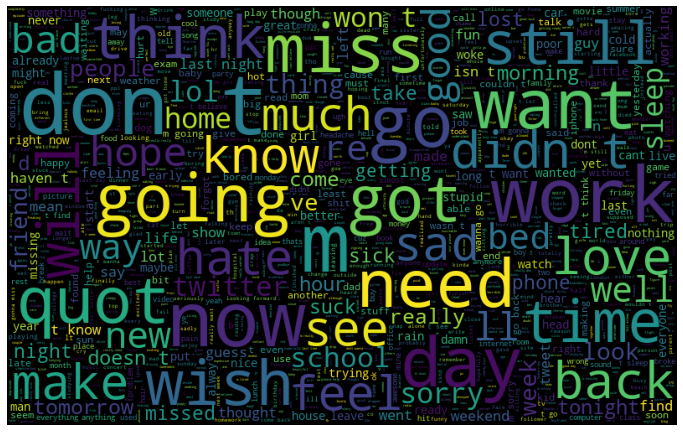

In [32]:
plt.figure(figsize=(12,10))
plt.imshow(WordCloud(max_words = 2000, width=800, height=500, max_font_size=100).generate(racist))
plt.axis('off')

# **Most words used in positive tweets**



In [33]:
filt_0 = df['label'] == 4

In [34]:
no_racist = df.loc[filt_0, 'tweet']

In [35]:
no_racist = ''.join(no_racist) 

(-0.5, 799.5, 499.5, -0.5)

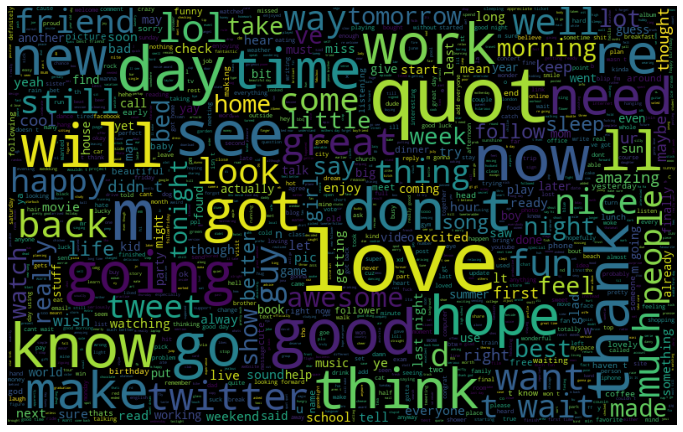

In [36]:
plt.figure(figsize = (12,10))
plt.imshow(WordCloud(max_words = 2000, width=800, height=500, max_font_size=100).generate(no_racist))
plt.axis('off')

# **Tokenize**

In [37]:
df['tweet'] = df['tweet'].apply(word_tokenize)

In [38]:
df

,label,tweet
0,0,"[thata, bummer, you, shoulda, got, david, carr, of, third, day, to, do, it]"
1,0,"[is, upset, that, he, can, t, update, his, facebook, by, texting, it, and, might, cry, as, a, result, school, also, blah]"
2,0,"[i, dived, many, times, for, the, ball, managed, to, save, the, rest, go, out, of, bounds]"
3,0,"[my, whole, body, feels, itchy, and, like, its, on, fire]"
4,0,"[no, itnot, behaving, at, all, i, m, mad, why, am, i, here, because, i, can, t, see, you, all, over, there]"
...,...,...
1599995,4,"[just, woke, up, having, no, school, is, the, best, feeling, ever]"
1599996,4,"[thewdb, com, very, cool, to, hear, old, walt, interviews, http, blip, fm, bmta]"
1599997,4,"[are, you, ready, for, your, mojo, makeover, ask, me, for, details]"
1599998,4,"[happy, th, birthday, to, my, boo, of, alll, time, tupac, amaru, shakur]"


# **Stopword removing**

In [39]:
stop_words = list(stopwords.words('english'))
stop_words.remove('not')

In [40]:
df['tweet'] = df['tweet'].apply(lambda x: [w for w in x if w not in stop_words])

In [41]:
df

,label,tweet
0,0,"[thata, bummer, shoulda, got, david, carr, third, day]"
1,0,"[upset, update, facebook, texting, might, cry, result, school, also, blah]"
2,0,"[dived, many, times, ball, managed, save, rest, go, bounds]"
3,0,"[whole, body, feels, itchy, like, fire]"
4,0,"[itnot, behaving, mad, see]"
...,...,...
1599995,4,"[woke, school, best, feeling, ever]"
1599996,4,"[thewdb, com, cool, hear, old, walt, interviews, http, blip, fm, bmta]"
1599997,4,"[ready, mojo, makeover, ask, details]"
1599998,4,"[happy, th, birthday, boo, alll, time, tupac, amaru, shakur]"


# **Lemmatization**

In [42]:
lemmetizer = WordNetLemmatizer()

In [43]:
df['tweet'] = df['tweet'].apply(lambda x: [lemmetizer.lemmatize(y) for y in x])

In [44]:
df

,label,tweet
0,0,"[thata, bummer, shoulda, got, david, carr, third, day]"
1,0,"[upset, update, facebook, texting, might, cry, result, school, also, blah]"
2,0,"[dived, many, time, ball, managed, save, rest, go, bound]"
3,0,"[whole, body, feel, itchy, like, fire]"
4,0,"[itnot, behaving, mad, see]"
...,...,...
1599995,4,"[woke, school, best, feeling, ever]"
1599996,4,"[thewdb, com, cool, hear, old, walt, interview, http, blip, fm, bmta]"
1599997,4,"[ready, mojo, makeover, ask, detail]"
1599998,4,"[happy, th, birthday, boo, alll, time, tupac, amaru, shakur]"


# **Back to DataFrame**

In [45]:
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([w for w in x]))

In [46]:
df

,label,tweet
0,0,thata bummer shoulda got david carr third day
1,0,upset update facebook texting might cry result school also blah
2,0,dived many time ball managed save rest go bound
3,0,whole body feel itchy like fire
4,0,itnot behaving mad see
...,...,...
1599995,4,woke school best feeling ever
1599996,4,thewdb com cool hear old walt interview http blip fm bmta
1599997,4,ready mojo makeover ask detail
1599998,4,happy th birthday boo alll time tupac amaru shakur


# **Feature Extraction -Tfidf** 

In [47]:
vect = TfidfVectorizer()
vc = vect.fit_transform(df['tweet'])
vect.get_feature_names()[:50]

['aa',
 'aabetter',
 'aabode',
 'aact',
 'aagain',
 'aagums',
 'aair',
 'aall',
 'aamp',
 'aampand',
 'aamplesson',
 'aand',
 'aandb',
 'aandout',
 'aare',
 'aarmed',
 'aat',
 'aawards',
 'ab',
 'aba',
 'ababa',
 'ababes',
 'ababy',
 'abac',
 'abacaxi',
 'aback',
 'abacus',
 'abad',
 'abadi',
 'abadlifechoice',
 'abadoned',
 'abagail',
 'abah',
 'abahd',
 'abaigail',
 'abailability',
 'abajito',
 'abajo',
 'abakhan',
 'abal',
 'abalone',
 'abamectin',
 'aban',
 'abandan',
 'abanded',
 'abandon',
 'abandonada',
 'abandonado',
 'abandonator',
 'abandond']

# **Splitting data into train and test**

In [48]:
X = df['tweet']
y = df['label']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# **Model Building**

## **Logistic Regression**


In [50]:
logit_reg = LogisticRegression(solver='liblinear')
model_logit_reg = Pipeline([('vectorizer', vect), ('classifier', logit_reg)])

In [51]:
model_logit_reg.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(solver='liblinear'))])

In [52]:
print("Traing accuracy score: ", model_logit_reg.score(X_train, y_train)*100)
print('\n')
print("Testing accuracy score: ", model_logit_reg.score(X_test, y_test)*100)

Traing accuracy score:  80.401484375


Testing accuracy score:  78.08562500000001


In [53]:
y_predicted = model_logit_reg.predict(X_test)

## **Naive Bayes**

In [54]:
naive_bayes = MultinomialNB()
model_naive_bayes = Pipeline([('vectorizer', vect), ('classifier', naive_bayes)])

In [55]:
model_naive_bayes.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [56]:
print("Traing accuracy score: ", model_naive_bayes.score(X_train, y_train)*100)
print('\n')
print("Testing accuracy score: ", model_naive_bayes.score(X_test, y_test)*100)

Traing accuracy score:  80.162890625


Testing accuracy score:  76.2471875


# **Confusion Matrix**

In [57]:
confusion_matrix = confusion_matrix(y_test, y_predicted)

Text(0.5, 1.0, 'Confusion Matrix')

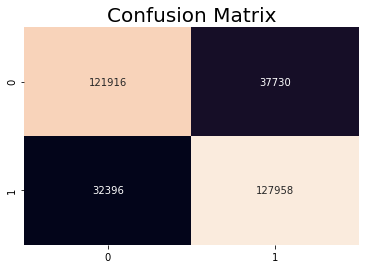

In [58]:
sns.heatmap(confusion_matrix, annot=True, fmt='.10g', xticklabels=True, yticklabels=True, cbar=False)

plt.title('Confusion Matrix', fontsize=20)

# ***Write your own text***

In [64]:
text = ["I am not good"]

In [65]:
sentiment =  model_logit_reg.predict(text)

if sentiment == 4:
  print('Positve')
else:
  print('Negative')

Negative
